# Learn Python Series (#32) - Data Science Part 3 - Pandas

### Repository
- https://github.com/pandas-dev/pandas
- https://github.com/python/cpython

### What will I learn?
- You will learn what "time series resampling" means;
- how and why resampling provides essential insights looking at different time series windows / resolutions;
- how to aggregate multiple columns of data and use column-specific resampling rules;
- how to compute rolling (moving) window values.

### Requirements
- A working modern computer running macOS, Windows or Ubuntu;
- An installed Python 3(.7) distribution, such as (for example) the Anaconda Distribution;
- The ambition to learn Python programming.

### Difficulty
- Beginner, intermediate

### Additional sample code files
The full - and working! - iPython tutorial sample code file is included for you to download and run for yourself right here:


The example CSV file that was used in the #31 episodes is copied to the lps-032 folder as well:

https://github.com/realScipio/learn-python-series/blob/master/lps-032/btcusdt_20190602_20190604_1min_hloc.csv

### GitHub Account
https://github.com/realScipio

# Learn Python Series (#32) - Data Science Part 3 - Pandas

### Re-loading the actual BTCUSDT financial data using `pandas`
First, let's again read and open the file `btcusdt_20190602_20190604_1min_hloc.csv` [found here](https://github.com/realScipio/learn-python-series/blob/master/lps-032/btcusdt_20190602_20190604_1min_hloc.csv) on my GitHub account, (after having saved the file to your current working directory, from which you're also opening it using `.read_csv()`):

In [2]:
import pandas as pd
df = pd.read_csv('btcusdt_20190602_20190604_1min_hloc.csv', 
                 parse_dates=['datetime'], index_col='datetime')
df.head()

,open,high,low,close,volume
datetime,,,,,
2019-06-02 00:00:00+00:00,8545.10,8548.55,8535.98,8537.67,17.349543
2019-06-02 00:01:00+00:00,8537.53,8543.49,8524.00,8534.66,31.599922
2019-06-02 00:02:00+00:00,8533.64,8540.13,8529.98,8534.97,7.011458
2019-06-02 00:03:00+00:00,8534.97,8551.76,8534.00,8551.76,5.992965
2019-06-02 00:04:00+00:00,8551.76,8554.76,8544.62,8549.30,15.771411


Let's again plot the opening prices of Bitcoin per minute, for a visual reference (to be compared shortly hereafter in the remainder of this tutorial episode):

/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


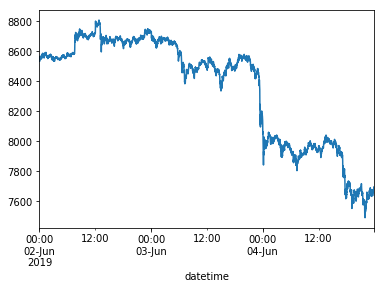

In [5]:
%matplotlib inline
df['open'].plot()

# Resampling time series using `.resample()`
A very interesting features the `pandas` library provides, is **time series resampling**. In essence this means **grouping** a number of small time span data rows into a larger time span.

For example, if you "resample" the current DataFrame consisting of 1-minute Binance ticks on the BTC_USDT trading pair into hourly intervals, that means you are grouping 60 1-minute ticks into 1 hourly tick.

To do this, you can use the `.resample()` method and pass in a so-called time span **"offset alias"** (= frequency) as the method argument.

For example, to resample the "open" column values (the BTCUSDT opening price data), using the mean values, and to assign those values to a new `df_hourly` DataFrame:

In [11]:
df_hourly = df['open'].resample('H').mean()
df_hourly.head()

datetime
2019-06-02 00:00:00+00:00    8562.740500
2019-06-02 01:00:00+00:00    8570.234667
2019-06-02 02:00:00+00:00    8565.278167
2019-06-02 03:00:00+00:00    8551.818333
2019-06-02 04:00:00+00:00    8553.886333
Freq: H, Name: open, dtype: float64

As you can see in the above `.head()` output, indeed the 1 minute ticks are precisely grouped into hourly values now.

It is also possible to achieve the same DataFrame output, by grouping by 60 minutes. This might seem trivial / just another way to achieve the same effect, but please note that it is also possible to prepend an integer value as a multiplier to the time span offset aliases (e.g. "5min", "15min", "60min", "4H", et cetera):

In [12]:
df_60min = df['open'].resample('60min').mean()
df_60min.head()

datetime
2019-06-02 00:00:00+00:00    8562.740500
2019-06-02 01:00:00+00:00    8570.234667
2019-06-02 02:00:00+00:00    8565.278167
2019-06-02 03:00:00+00:00    8551.818333
2019-06-02 04:00:00+00:00    8553.886333
Freq: 60T, Name: open, dtype: float64

# Resampling time series data by aggregating (using `.agg()`) multiple columns each with a different operation
In the previous examples it was explained how to resample **one column** of data values (the 1-minute opening prices of BTCUSDT) into larger time spans. However, our current data set contains multiple columns of data ("open", "low", "high", "close", "volume") and ideally you want to resample each column differently.

For example:

- the "opening prices" of 1-hour ticks should stay the first value of the first minute of data. Each hour of data still began with the first tick of data;
- the "low prices" within 1 hour of data should be the minimum value recorded within that entire hour;
- the "high prices" within 1 hour of data should be the maximum value recorded within that entire hour;
- the "closing prices" should remain the last recorded value;
- the "volume" data should be summed as a cumulative value within each hour.

To do this, you can resample by chaining the `.resample()` method with an `agg()` (short for "aggregate") method, and then pass in a dictionary containing key-value pairs reflected by "column": "how"). Like so:

In [13]:
df_complete_1h = df.resample('H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'max',
    'volume': 'sum'
})
df_complete_1h.head()

,open,high,low,close,volume
datetime,,,,,
2019-06-02 00:00:00+00:00,8545.10,8588.33,8524.00,8585.88,593.133892
2019-06-02 01:00:00+00:00,8564.97,8598.00,8550.89,8595.58,787.293606
2019-06-02 02:00:00+00:00,8570.35,8582.64,8540.00,8582.15,660.086969
2019-06-02 03:00:00+00:00,8549.23,8569.23,8525.97,8565.81,664.017888
2019-06-02 04:00:00+00:00,8545.93,8573.18,8540.40,8570.53,498.116310


**Why multi-dimensional data-specific resampling and aggregation is very powerful and useful:**

The techniques discussed just now are very powerful and useful, because - in case you (for example) want to perform technical analysis on OHLC&Volume data ticks on multiple time span resolutions / intervals -, when taking a close look at trading data (for example on an exchange such as Binance, or using visual charts provided via TradingView charting widgets), and "zooming in" on the 1-minute candles, price might appear to be in a short-term downtrend, but when zooming out to (for example) the 4H time span resolution then you suddenly notice price is still in an uptrend.

Visually inspecting time series (e.g. trading) data using just one specific time span resolution can therefore be deceiving and could lead you to forming the wrong conclusions (which can be very costly); when in a major (large time span) uptrend but focusing only on 1-minute (small time span) data, merely correcting in a short-term downtrend, you might be inclined to sell, only very shortly afterwards finding out the major (large time span) uptrend to continue. And vice versa, of course. Deriving insights by looking at "multiple time series zoom levels", is very important to be able to properly estimate the "intensity" of "change" and "direction".

Using the combined `resample()` and `agg()` data grouping methods, as explained above, the only data you need to fetch from source is **the smallest time span resolution you are interested in**. On Binance for example you can view the time span resolutions "1min", "3min", "5min", "15min", "30min", "1H", "2H", "4H", "6H", "12H", "1D", "1W" and "1M".
By fetching **only** the 1-min k-line tick data, you can resample and aggregate **all** time span resolution data, which can bring you better insights to come to better decision making: exactly the core objective of Data Science.

# Rolling window calculations using `.rolling()`
Both in Data Science (in general) and financial technical analysis (specifically), keeping track of rolling / moving averages may yield powerful new insights. When you're active with crypto currencies, at some point (rather sooner than later, probably) you will come accross exchanges for trading tokens, which come with a multitude of "technical indicators". Again looking at the Binance exchange, in this example case at the BTCUSDT trading pair (Bitcoin against the USD-pegged Tether token), by default (viewing any time span resolution) in the same charts where the Open-Low-High-Close candles are plotted you'll also see two colored lines dubbed as _"MA(25)"_ and _"MA(99)"_.

In more financially versed circles, those two "technical indicators" are referred to as **"Simple** Moving Averages" (as opposed to for example "Exponential Moving Averages").
A Simple Moving Average is computed by looking (at any given tick) at N interval ticks backward in time, then computing the mean (average) value of those N ticks, and adding that SMA value to the current tick.

For example "(S)MA(25)" on Binance means: "_let's use the previous 25 minute values, compute the mean value from those, and use that as a new value; the next minute we will shift upward 1 tick and re-compute the mean values for the next interval_". In this case (at "MA(25)") `N=25` and the "MA(99)" indicators uses N=99.

The mean values are "moving" or "rolling" as time goes by, and by storing those rolling averages as a new column in our DataFrame we get a much "smoother" representation of how price has been developing over time.

`pandas` provides a `.rolling()` method to compute the same data you see on a trading exchange such as Binance. In order to produce similar results, let's again use the original DataFrame (the non-resampled 1-minute ticks found in the provided CSV file), but this time only the 'open' price column data.

In [33]:
import pandas as pd
df = pd.read_csv('btcusdt_20190602_20190604_1min_hloc.csv', 
                 parse_dates=['datetime'], index_col='datetime')

df['sma25'] = df['open'].rolling(window=25).mean()
df['sma99'] = df['open'].rolling(window=99).mean()
df[['open','sma25','sma99']].tail()

,open,sma25,sma99
datetime,,,
2019-06-04 23:55:00+00:00,7676.54,7659.2484,7645.560404
2019-06-04 23:56:00+00:00,7689.76,7660.5348,7646.478081
2019-06-04 23:57:00+00:00,7696.69,7662.3408,7647.454747
2019-06-04 23:58:00+00:00,7697.66,7664.1404,7648.441212
2019-06-04 23:59:00+00:00,7690.97,7665.6016,7649.447677


The code line ...

`df['sma25'] = df['open'].rolling(window=25).mean()`

... means:

- let's create a new DataFrame column named "sma25";
- use a vectorised / column-based operation method on every row (cell) within that DataFrame column;
- by using the data found in the "open" column;
- use N=25 as the rolling window;
- and compute & store its mean (average) value in the "sma25" column.

If we now plot the 1-minute data ticks found in columns 'open','sma25' and 'sma99', and for visualisation matters let's only plot the 1-minute ticks of June, 2, 2019 - otherwise the lines would be too close to visually distinguish -, we get the following visual overview:

/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


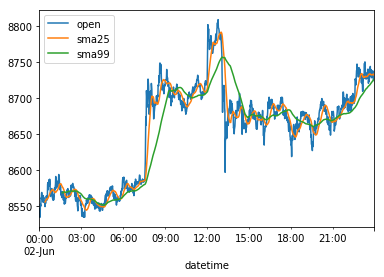

In [24]:
%matplotlib inline
df[['open','sma25','sma99']]['2019-06-02'].plot()

**Nota bene:** on the "sma99" data, since we need 99 ticks of data before we're able to begin plotting, if you take a close look at the above plot, bottom-left, on the green sma99 line, you see that there's a "gap".

The same can be found when printing the first 5 values using `.head()` (instead of `.tail()`):

In [27]:
df[['open','sma25','sma99']].head()

,open,sma25,sma99
datetime,,,
2019-06-02 00:00:00+00:00,8545.10,NaN,NaN
2019-06-02 00:01:00+00:00,8537.53,NaN,NaN
2019-06-02 00:02:00+00:00,8533.64,NaN,NaN
2019-06-02 00:03:00+00:00,8534.97,NaN,NaN
2019-06-02 00:04:00+00:00,8551.76,NaN,NaN


The `NaN` values mean **"Not a Number"** (PS: in a forthcoming Data Science episode using `pandas` you'll learn about multiple ways on dealing with missing data, and dealing with "malformed" or even "incorrect" data points, and how to deal with those in a process called "Data Munging").

The `.rolling()` method comes with a parameter called `min_periods=`, which is by default set to the same number `N` as the `window=` parameter, in this case 25 and 99, respectively.

However, if we explicitly pass `min_periods=0`, then immeditely a "best-guess" value is computed based on < N values (meaning, at the first tick, the "sma25" value is identical to the "open" value, on the second tick "sma25" is the mean value of current and the previous ticks, until equal to or more than N ticks are present).

In code:

In [28]:
df['sma25'] = df['open'].rolling(window=25, min_periods=0).mean()
df['sma99'] = df['open'].rolling(window=99, min_periods=0).mean()
df[['open','sma25','sma99']].head()

,open,sma25,sma99
datetime,,,
2019-06-02 00:00:00+00:00,8545.10,8545.100000,8545.100000
2019-06-02 00:01:00+00:00,8537.53,8541.315000,8541.315000
2019-06-02 00:02:00+00:00,8533.64,8538.756667,8538.756667
2019-06-02 00:03:00+00:00,8534.97,8537.810000,8537.810000
2019-06-02 00:04:00+00:00,8551.76,8540.600000,8540.600000


Visually plotted:

/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


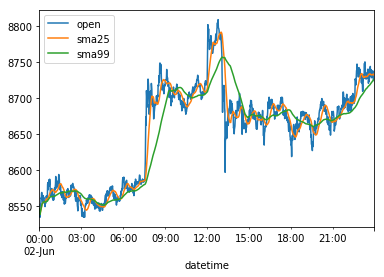

In [31]:
%matplotlib inline
df[['open','sma25','sma99']]['2019-06-02'].plot()

And indeed, as you can see (while looking closely at the plot data bottom-left) now there's no missing gap, as there are no `NaN` values in the "sma25" and "sma99" columns.

# What did we learn, hopefully?
Apart from how to (technically) use the `pandas` methods `.resample()`, `.agg()` and `.rolling()`, hopefully you've also learned _why_ using those techniques provide essential insights while analysing time series data, such as crypto currency trading data.

### Thank you for your time!

### Curriculum (of the `Learn Python Series`):

- [Learn Python Series - Intro](https://steemit.com/utopian-io/@scipio/learn-python-series-intro)
- [Learn Python Series (#2) - Handling Strings Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-2-handling-strings-part-1)
- [Learn Python Series (#3) - Handling Strings Part 2](https://steemit.com/utopian-io/@scipio/learn-python-series-3-handling-strings-part-2)
- [Learn Python Series (#4) - Round-Up #1](https://steemit.com/utopian-io/@scipio/learn-python-series-4-round-up-1)
- [Learn Python Series (#5) - Handling Lists Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-5-handling-lists-part-1)
- [Learn Python Series (#6) - Handling Lists Part 2](https://steemit.com/utopian-io/@scipio/learn-python-series-6-handling-lists-part-2)
- [Learn Python Series (#7) - Handling Dictionaries](https://steemit.com/utopian-io/@scipio/learn-python-series-7-handling-dictionaries)
- [Learn Python Series (#8) - Handling Tuples](https://steemit.com/utopian-io/@scipio/learn-python-series-8-handling-tuples)
- [Learn Python Series (#9) - Using Import](https://steemit.com/utopian-io/@scipio/learn-python-series-9-using-import)
- [Learn Python Series (#10) - Matplotlib Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-10-matplotlib-part-1)
- [Learn Python Series (#11) - NumPy Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-11-numpy-part-1)
- [Learn Python Series (#12) - Handling Files](https://steemit.com/utopian-io/@scipio/learn-python-series-12-handling-files)
- [Learn Python Series (#13) - Mini Project - Developing a Web Crawler Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-13-mini-project-developing-a-web-crawler-part-1)
- [Learn Python Series (#14) - Mini Project - Developing a Web Crawler Part 2](https://steemit.com/utopian-io/@scipio/learn-python-series-14-mini-project-developing-a-web-crawler-part-2)
- [Learn Python Series (#15) - Handling JSON](https://steemit.com/utopian-io/@scipio/learn-python-series-15-handling-json)
- [Learn Python Series (#16) - Mini Project - Developing a Web Crawler Part 3](https://steemit.com/utopian-io/@scipio/learn-python-series-16-mini-project-developing-a-web-crawler-part-3)
- [Learn Python Series (#17) - Roundup #2 - Combining and analyzing any-to-any multi-currency historical data](https://steemit.com/utopian-io/@scipio/learn-python-series-17-roundup-2-combining-and-analyzing-any-to-any-multi-currency-historical-data)
- [Learn Python Series (#18) - PyMongo Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-18-pymongo-part-1)
- [Learn Python Series (#19) - PyMongo Part 2](https://steemit.com/utopian-io/@scipio/learn-python-series-19-pymongo-part-2)
- [Learn Python Series (#20) - PyMongo Part 3](https://steemit.com/utopian-io/@scipio/learn-python-series-20-pymongo-part-3)
- [Learn Python Series (#21) - Handling Dates and Time Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-21-handling-dates-and-time-part-1)
- [Learn Python Series (#22) - Handling Dates and Time Part 2](https://steemit.com/utopian-io/@scipio/learn-python-series-22-handling-dates-and-time-part-2)
- [Learn Python Series (#23) - Handling Regular Expressions Part 1](https://steemit.com/utopian-io/@scipio/learn-python-series-23-handling-regular-expressions-part-1)
- [Learn Python Series (#24) - Handling Regular Expressions Part 2](https://steemit.com/utopian-io/@scipio/learn-python-series-24-handling-regular-expressions-part-2)
- [Learn Python Series (#25) - Handling Regular Expressions Part 3](https://steemit.com/utopian-io/@scipio/learn-python-series-25-handling-regular-expressions-part-3)
- [Learn Python Series (#26) - pipenv & Visual Studio Code](https://steemit.com/utopian-io/@scipio/learn-python-series-26-pipenv-and-visual-studio-code)
- [Learn Python Series (#27) - Handling Strings Part 3 (F-Strings)](https://steemit.com/utopian-io/@scipio/learn-python-series-27-handling-strings-part-3-f-strings)
- [Learn Python Series (#28) - Using Pickle and Shelve](https://steemit.com/utopian-io/@scipio/learn-python-series-28-using-pickle-and-shelve)
- [Learn Python Series (#29) - Handling CSV](https://steemit.com/utopian-io/@scipio/learn-python-series-29-handling-csv)
- [Learn Python Series (#30) - Data Science Part 1 - Pandas](https://steemit.com/utopian-io/@scipio/learn-python-series-30-data-science-part-1-pandas)
- [Learn Python Series (#31) - Data Science Part 2 - Pandas](https://steemit.com/utopian-io/@scipio/learn-python-series-31-data-science-part-2-pandas) 